# Lecture 9 - MLE and MAP continued; Conjugate Priors

Last class, we introduced the **Bayesian interpretation** of a supervised learning algorithm, and formulated two approaches for search for parameters of the model:

1. **Maximum Likelihood Estimation (MLE)**

2. **Maximum A Posteriori (MAP)**

In our problem, the hypothesis are the *unknown* **(hyper-)parameters** $\mathbf{w}$.

* In Bayesian statistical inferencing, we are then trying to find the $\mathbf{w}$'s that maximizing the posterior probability.
* In classical statistical inferencing, on the other hand, we are only computing the probability of some hypothesis (the *null hypothesis*).

<h2 align="center"><span style="color:blue">Maximum Likelihood Estimation (MLE)</span></h2>
<center>(Frequentist approach)</center>

$$\arg_{\mathbf{w}} \max P(\mathbf{x}|\mathbf{w})$$

In **Maximum Likelihood Estimation** (also referred to as **MLE** or **ML**) we want to *find the set of parameters* that **maximize** the data likelihood $P(\mathbf{x}|\mathbf{w})$. We want to find the *optimal* set of parameters under some assumed distribution such that the data is most likely.

<h2 align="center"><span style="color:orange">Maximum A Posteriori (MAP)</span></h2>
<center>(Bayesian approach)</center>

\begin{align}
& \arg_{\mathbf{w}} \max P(\mathbf{x}|\mathbf{w})P(\mathbf{w}) \\ 
& \propto \arg_{\mathbf{w}} \max P(\mathbf{w}|\mathbf{x})
\end{align}

In **Maximum A Posteriori** (also referred as **MAP**) we want to *find the set of parameters* that **maximize** the posteriori probability $P(\mathbf{w}|\mathbf{x})$. We want to find the *optimal* set of parameters under some assumed distribution such that the parameters are most likely to have been drawn off of given some prior beliefs.

In [1]:
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-colorblind')

For the Least Squares objective function in our regression problem, we showed that:

* If we do not use a regularization term, then we are performing MLE. We are maximizing the data likelihood which takes the form of a Gaussian distribution.

* If we use a regularization term, then we are performing MAP. We are maximizing the posterior distribution, which is equivalent at maximizing the data likelihood times the prior probability on the parameters.
    * If we use *ridge regularizer*, both data likelihood and prior distribution take the form of a Gaussian.
    * If we use *lasso regularizer*, data likelihood takes the form of a Gaussian distribution and the prior takes the form of a Laplacian distribution.
    
    
Furthermore, this Bayesian interpretation allows us to think of a problem in a different way: if all I'm doing is maximizing a data likelihood or posterior, then I can design any distribution shape I want.

* Often times, this lift is distributional form will be much more applicable to the data, as it fits better.

* **What is the distribution form of the error values for our model?**

* **Why is it so common to assume Gaussian error distribution?** The official reason why people always assume a Gaussian error distribution goes back to something called the Central Limit Theorem. The Central Limit Theorem says that whenever a measurement is subject to a very large number of very small errors, the probability distribution for the total error is driven toward the Gaussian distribution. This is true regardless of the form of the original probability distributions of the individual errors.

## Example

**Problem: Suppose I flip a coin 3 times and observe the event H-H-H. What is the probability of flipping Heads (H) on the next coin flip?**

Now, let's consider heads=1 and tails=0, so our sample space is $S=\{1,0\}$. The probability of heads is equal to some *unknown* value $\mu$, then:

\begin{align}
& P(x=1 | \mu) = \mu \\
& P(x=0|\mu) = 1-\mu
\end{align}

We can compute the data likelihood as:

$$P(x|\mu) = \mu^x(1-\mu)^{1-x} = \begin{cases}\mu & \text{if }x=1 \\ 1-\mu & \text{if } x=0 \end{cases}$$

* This is the **Bernoulli distribution**. The mean and variance of the Bernoulli distribution are: $E[x] = \mu$ and $E[\left(x- E[x]\right)^2] = \mu(1-\mu)$.

* So, for every outcome of the event $E$, we will model it using a Bernoulli distribution, and each outcome is pairwise **conditionally independent**. Therefore, we have the event $E$ contains i.i.d. outcomes.

### Method 1: Maximum Likelihood Estimator

For simplicity of calculation, assume that the event contains outcomes: $E=x_1\cap x_2\cap \dots\cap x_N$, where $x_i=\{0,1\}$ (0 for Tails and 1 for Heads). Then, for an experiment with $N$ samples, we can write the **data likelihood** as:


\begin{align}
P(E|\mu) &= P(x_1\cap x_2\cap \dots\cap x_N|\mu) \\
&= P(x_1|\mu)P(x_2|\mu)\dots P(x_N|\mu) \\
&= \prod_{n=1}^N P(x_n|\mu) \\
&= \prod_{n=1}^N \mu^{x_n} (1-\mu)^{1-x_n}
\end{align}


* Now, we are interested in finding the value of $\mu$ given some data set $E$. 

We now optimize the data likelihood. What trick can we use?

$$arg_\mathbf{\mu} \max P(E|\mu) = \arg_\mathbf{\mu} \max \ln \left( P(E|\mu) \right)$$

because the $\ln(\bullet)$ is a monotonic function.

Where 
$$\ln(P(E|\mu) = \sum_{n=1}^N \left(x_n \ln(\mu) + (1-x_n)\ln(1-\mu)\right)$$

So now we can take the derivative of this function wrt to $\mu$ and equal it to zero:

$$\frac{\partial \ln(P(E|\mu))}{\partial \mu} = 0$$

\begin{align}
(1-\mu)\sum_{n=1}^N x_n - \mu \left(N - \sum_{n=1}^N x_n\right) &= 0 \\
\sum_{n=1}^N x_n - \mu\sum_{n=1}^N x_n - \mu N + \mu\sum_{n=1}^N x_n &= 0 \\
\sum_{n=1}^N x_n - \mu N &= 0 \\
\mu &= \frac{1}{N} \sum_{n=1}^N x_n
\end{align}

So the MLE estimation of the probability of seeing heads in the next coin flip is equal to **relative frequency** of outcome heads.

* Suppose you flipped the coin only once, and saw Tails. The probability of flipping Heads according to MLE would be 0.

* MLE is **purely data driven**! This is sufficient *when* we have lots and lots of data. 

### Method 2: Maximum A Posteriori

In the MAP estimation of $\mu$, we are instead optimizing the posterior probability:

\begin{align}
&\arg_{\mu} \max P(\mu|E) \\
=& \arg_{\mu} \max \frac{P(E|\mu) P(\mu)}{P(E)} \\
\propto & \text{  } \arg_{\mu} \max P(E|\mu) P(\mu), P(E)\text{ is some constant value} 
\end{align}

We have defined the data likelihood $P(E|\mu)$, we now need to choose a **prior distribution** $P(\mu)$.

* This prior distribution will *encode* any prior knowledge we have about the hidden sate of the problem, in this case, the type of coin that was used.

Let's say our **prior distribution** is a Beta Distribution. A **Beta Distribution** takes the form:

$$\text{Beta}(x|\alpha,\beta) = \frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)} x^{\alpha-1} (1-x)^{\beta-1}$$

where $\Gamma(x) = (x-1)!$ and $\alpha,\beta>0$.

The mean and variance of the Beta distribution are: $E[x] = \frac{\alpha}{\alpha+\beta}$ and $E[(x-E[x])^2] = \frac{\alpha\beta}{(\alpha+\beta)^2(\alpha+\beta+1)}$.

* Let's see what that looks like:

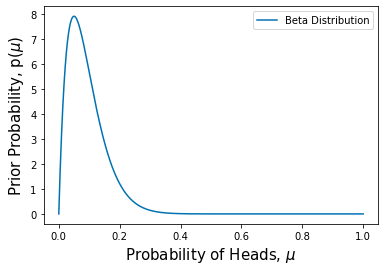

In [11]:
import math

a = 2
b = 20
x = np.arange(0,1,0.0001)
Beta = (math.gamma(a+b)/(math.gamma(a)*math.gamma(b)))*x**(a-1)*(1-x)**(b-1)

plt.plot(x, Beta, label='Beta Distribution')
plt.legend(loc='best')
plt.xlabel('Probability of Heads, $\mu$',fontsize=15)
plt.ylabel('Prior Probability, p($\mu$)',fontsize=15)
plt.show()

Using the Beat Distribution as out prior, we have:

\begin{align}
P(\mu|\alpha,\beta) &= \frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)} \mu^{\alpha-1} (1-\mu)^{\beta-1} \\
&\propto \mu^{\alpha-1} (1-\mu)^{\beta-1}
\end{align}

Let:
* $m$ the number of heads
* $l$ the number of tails
* $N=m+l$ the total number of coin flips 

We can write our **posterior probability** as:

\begin{align}
P(\mu|E) &= \frac{P(E|\mu)P(\mu)}{P(E)}\\
&\propto P(E|\mu)P(\mu)\\
&= \left(\prod_{n=1}^N \mu^{x_n} (1-\mu)^{1-x_n}\right) \mu^{\alpha-1} (1-\mu)^{\beta-1} \\
&= \mu^m (1-\mu)^l \mu^{\alpha-1} (1-\mu)^{\beta-1} \\
&= \mu^{m+\alpha-1} (1-\mu)^{l+\beta-1}
\end{align}

* The posterior probability has the same shape as the data likelihood. 

* This is a special case called **Conjugate Prior Relationship**, which happens when the posterior has the same form as the prior.

We can now optimize our posterior probability, and we will apply the same trick:

$$arg_\mathbf{\mu} \max P(\mu|E) = \arg_\mathbf{\mu} \max \ln \left( P(\mu|E) \right)$$

where

$$ \ln \left( P(\mu|E) \right) =  (m+\alpha-1)\ln(\mu) + (l+\beta-1)\ln(1-\mu)$$

We can now *optimize* our posterior probability:

\begin{align}
\frac{\partial  \ln \left( P(\mu|E) \right)}{\partial \mu} &= 0\\
\frac{m+\alpha-1}{\mu} + \frac{l+\beta-1}{1-\mu} &= 0\\
\mu &= \frac{m+\alpha-1}{m + l + \alpha + \beta -2}
\end{align}

This is our estimation of the probability of heads using MAP!

* Our estimation for the probability of heads, $\mu$, is going to depend on $\alpha$ and $\beta$ introduced by the prior distribution. We saw that they control the level of certainty as well as the center value.

* With only a few samples, the prior will play a bigger role in the decision, but eventually the data takes over the prior.

Let's run a simulation to compare MAP and MLE estimators.

In [12]:
trueMU = 0.5 # 0.5 for a fair coin
Nflips = 10
# prior parameters that we need to assume/choose
a = 2
b = 20

Outcomes = []
for i in range(Nflips):
    Outcomes += [stats.bernoulli(trueMU).rvs(1)[0]] # each sample will be 1 if it's heads or 0 if it's tails
    print(Outcomes)
    print('MLE aka Frequentist Probability of Heads = ', np.sum(Outcomes)/len(Outcomes))
    print('MAP aka Bayesian Probability of Heads = ', (np.sum(Outcomes)+a-1)/(len(Outcomes)+a+b-2))
    input('Press enter to flip the coin again...\n')

[0]
MLE aka Frequentist Probability of Heads =  0.0
MAP aka Bayesian Probability of Heads =  0.047619047619047616
Press enter to flip the coin again...

[0, 1]
MLE aka Frequentist Probability of Heads =  0.5
MAP aka Bayesian Probability of Heads =  0.09090909090909091
Press enter to flip the coin again...

[0, 1, 1]
MLE aka Frequentist Probability of Heads =  0.6666666666666666
MAP aka Bayesian Probability of Heads =  0.13043478260869565
Press enter to flip the coin again...

[0, 1, 1, 0]
MLE aka Frequentist Probability of Heads =  0.5
MAP aka Bayesian Probability of Heads =  0.125
Press enter to flip the coin again...

[0, 1, 1, 0, 0]
MLE aka Frequentist Probability of Heads =  0.4
MAP aka Bayesian Probability of Heads =  0.12
Press enter to flip the coin again...

[0, 1, 1, 0, 0, 1]
MLE aka Frequentist Probability of Heads =  0.5
MAP aka Bayesian Probability of Heads =  0.15384615384615385
Press enter to flip the coin again...

[0, 1, 1, 0, 0, 1, 0]
MLE aka Frequentist Probability of

<h2 align="center"><span style="color:blue">Maximum Likelihood Estimation (MLE)</span></h2>
<center>(Frequentist approach)</center>

$$\arg_{\mathbf{w}} \max P(\mathbf{x}|\mathbf{w})$$

In **Maximum Likelihood Estimation** we *find the set of parameters* that **maximize** the data likelihood $P(\mathbf{x}|\mathbf{w})$. We find the *optimal* set of parameters under some assumed distribution such that the data is most likely.

* MLE focuses on maximizing the data likelihood, which *usually* provides a pretty good estimate

* A common trick to maximize the data likelihood is to maximize the log likelihood

* MLE is purely data driven 

* MLE works best when we have lots and lots of data

* MLE will likely overfit when we have small amounts of data or, at least, becomes unreliable

* It estimates relative frequency for our model parameters. Therefore it needs incredibly large amounts of data (infinite!) to estimate the true likelihood parameters
    * This is a problem when we want to make inferences and/or predictions outside the range of what the training data has learned

<h2 align="center"><span style="color:orange">Maximum A Posteriori (MAP)</span></h2>
<center>(Bayesian approach)</center>

\begin{align}
& \arg_{\mathbf{w}} \max P(\mathbf{x}|\mathbf{w})P(\mathbf{w}) \\ 
& \propto \arg_{\mathbf{w}} \max P(\mathbf{w}|\mathbf{x})
\end{align}

In **Maximum A Posteriori** we *find the set of parameters* that **maximize** the the posterior probability $P(\mathbf{w}|\mathbf{x})$. We find the *optimal* set of parameters under some assumed distribution such that the parameters are most likely to have been drawn off of.

* MAP focuses on maximizing the posterior probability - data  likelihood with a prior

* A common trick to maximize the posterior probability is to maximize the log likelihood

* MAP is data driven 

* MAP is mostly driven by the prior beliefs

* MAP works great with small amounts of data *if* our prior was chosen well

* We need to assume and select a distribution for our prior beliefs
    * A wrong choice of prior distribution can impact negatively our model estimation
    
* When we have lots and lots of data, the data likelihood will take over and the posterior will depend less and less on the prior

# Conjugate Priors

* Two distributions have a **conjugate prior** relationship when the form of the posterior is the same as the form of the prior.

    * For example, consider the data likelihood $P(X|\mu) \sim \mathcal{N}(\mu, \sigma^2)$ and the prior distribution $P(\mu) \sim \mathcal{N}(\mu_0,\sigma_0^2)$. The posterior probability will also be Gaussian distributed
    
$$P(\mu|X) \sim \mathcal{N}\left(\frac{\sum_{i=1}^N x_i\sigma_0^2 + \mu_0\sigma^2}{N\sigma_0^2+\sigma^2},\left(\frac{N}{\sigma^2}+\frac{1}{\sigma_0^2}\right)^{-1}\right)$$

<!-- Proof: 

\begin{align}
P(\mu|X) &\propto P(X|\mu)P(\mu) \\
& = \prod_{i=1}^N \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{1}{2}\frac{(x_i-\mu)^2}{\sigma^2}\right)\frac{1}{\sqrt{2\pi\sigma_0^2}}\exp\left(-\frac{1}{2}\frac{(\mu-\mu_0)^2}{\sigma_0^2}\right) \\
&=  \frac{1}{\sqrt{2\pi\sigma^2}}\frac{1}{\sqrt{2\pi\sigma_0^2}}\exp\left(\sum_{i=1}^N \left(-\frac{1}{2}\frac{(x_i-\mu)^2}{\sigma^2}\right) -\frac{1}{2}\frac{(\mu-\mu_0)^2}{\sigma_0^2} \right) \\
&=  \frac{1}{\sqrt{2\pi\sigma^2}}\frac{1}{\sqrt{2\pi\sigma_0^2}}\exp\left(-\frac{1}{2}\left(\sum_{i=1}^N \frac{(x_i-\mu)^2}{\sigma^2} +\frac{(\mu-\mu_0)^2}{\sigma_0^2} \right) \right) \\
&=  \frac{1}{\sqrt{2\pi\sigma^2}}\frac{1}{\sqrt{2\pi\sigma_0^2}}\exp\left(-\frac{1}{2}\left(\frac{\sum_{i=1}^N x_i^2-2\sum_{i=1}^N x_i\mu +\mu^2N)}{\sigma^2} +\frac{\mu^2-2\mu\mu_0 +\mu_0^2}{\sigma_0^2} \right) \right) \\
&=  \frac{1}{\sqrt{2\pi\sigma^2}}\frac{1}{\sqrt{2\pi\sigma_0^2}}\exp\left(-\frac{1}{2} \left(\frac{N}{\sigma^2}+\frac{1}{\sigma_0^2}\right) - 2\mu \left( \frac{\sum_{i=1}^N x_i}{\sigma^2} + \frac{\mu_0}{\sigma_0^2}\right) + \frac{\sum_{i=1}^N x_i^2}{\sigma^2} + \frac{\mu_0^2}{\sigma_0^2}\right) \\
&=  \frac{1}{\sqrt{2\pi\sigma^2}}\frac{1}{\sqrt{2\pi\sigma_0^2}}\exp\left(-\frac{1}{2} \left(\frac{N}{\sigma^2}+\frac{1}{\sigma_0^2}\right) \left(\mu^2 - 2\mu\left(\frac{\sum_{i=1}^N x_i}{\sigma^2} + \frac{\mu_0}{\sigma_0^2}\right)\left(\frac{N}{\sigma^2}+\frac{1}{\sigma_0^2}\right)^{-1} \right) \right) \exp\left(\frac{\sum_{i=1}^N x_i}{\sigma^2} + \frac{\mu_0^2}{\sigma_0^2}\right)
\end{align} -->

* There are many conjugate prior relationships, e.g., Bernoulli-Beta, Gausian-Gaussian, Gaussian-Inverse Wishart, Multinomial-Dirichlet.

* Conjugate prior relationships play an important role for online **updating** our prior distribution.

* In an online model estimation scenario, where we the posterior has the same form as the prior, we can use the posterior as our new prior. This new prior is now data informative and will update it's parameters based on (1) our initial choice, and (2) the data. 

### Example of Online Updating of the Prior using Conjugate Priors (Gaussian-Gaussian)

Let's consider the example presented in the Bishop textbook (Figure 3.7 in page 155).

Consider a single input variable $x$, a single target variable $t$ and a linear model of the form $y(x,w) = w_0 + w_1x$.
Because this has just two parameters coefficients, $w=[w_0, w_1]^T$, we can plot the prior and posterior distributions directly in parameter space (2-dimensional parameter space).

Let's generate some synthetic data from the function $f(x, a) = w_0 + w_1x$ with parameter values $w_0 = −0.3$ and $w_1 = 0.5$ by first choosing values of $x_n$ from the uniform distribution $U(x_n|−1, 1)$, then evaluating $f(x_n, \mathbf{w})$, and finally adding Gaussian noise with standard deviation of $\sigma = 0.2$ to obtain the target values $t_n$.

$$t_n = f(x_n, \mathbf{w}) + \epsilon = -0.3 + 0.5 x_n + \epsilon\text{, where }\epsilon\sim N(0,0.2^2) $$

* Our **goal** is to recover the values of $w_0$ and $w_1$ from such data, and we will explore the dependence on the size of the data set.

For some data, $\{x_n,t_n\}_{n=1}^N$, we can pose this problem in terms of **Regularized Least Squares**:

\begin{align}
E(\mathbf{w}) &= \frac{1}{N} \sum_{n=1}^N \left(t_n - y_n\right)^2 + \lambda \sum_{i=0}^1 w_i^2 \\
&= \frac{1}{N} \sum_{n=1}^N \left(t_n - y_n\right)^2 + \lambda \left(w_0^2 + w_1^2\right)\\
& \Rightarrow \arg_{\mathbf{w}}\min J(\mathbf{w})
\end{align}

Using **MAP**, we can rewrite our objective using the **Bayesian interpretation**:

\begin{align}
\arg_{\mathbf{w}} \max P(\mathbf{e}|\mathbf{w})P(\mathbf{w})
\end{align}

Let's consider the data likelihood, $P(\mathbf{e}|\mathbf{w})$, to be a Gaussian distribution with mean $\mu = 0$ and variance $\sigma^2 = 0.2^2$. And let's also consider the prior distribution, $P(\mathbf{w})$, to be a Gaussian distribution with mean $\mu_0$ and variance $\sigma_0^2$. Then we can rewrite our optimization as:

\begin{align}
\arg_{\mathbf{w}} \max N(\mathbf{e}|0,0.2^2)N(\mathbf{w}|\mu_0,\sigma_0)
\end{align}

Note that we **do not known** the parameters of the prior distribution. The parameters of the prior distribution will have to be chosen by the user (us). And they will essentially *encode* any behavior or a priori knowledge we may have about the weights.

Both our data likelihood and prior distributions are in a 2-dimensional space (this is because our *model order* is $M=2$ -- we have 2 parameters!).

### Conjugate Prior Relationship

For a D-dimensional Gaussian data likelihood with mean $\mu$ and covariance $\beta\mathbf{I}$ and a prior distribution with mean $\mu_0$ and covariance $\Sigma_0$

\begin{align}
P(\mathbf{e}|\mathbf{w}) &\sim N(\mathbf{\mu}, \beta\mathbf{I}) \\
P(\mathbf{w}) &\sim N(\mathbf{\mu}_0,\Sigma_0)
\end{align}

The posterior distribution

\begin{align}
P(\mathbf{w}|\mathbf{e}) &\sim N\left(\mathbf{\mu}_N, \Sigma_N\right) \\
\mathbf{\mu}_N &= \Sigma_N \left(\Sigma_0^{-1}\mathbf{\mu}_0+\beta\mathbf{\Phi}^T\mathbf{t}\right)\\
\Sigma_N^{-1} &= \Sigma_0^{-1} + \beta \mathbf{\Phi}^T\mathbf{\Phi}
\end{align}

where $\mathbf{\Phi}$ is the matrix of features extracted from the data samples $\{x_i\}_{i=1}^N$. If we consider polynomial features, then $\mathbf{\phi}(\mathbf{x}_k) = \left[x_k^0, x_k^1, \cdots, x_k^M \right]$.

* What happens with different values of $\beta$ and $\Sigma_0$?

To simplify, let's assume $\Sigma_0 = \alpha^{-1}\mathbf{I}$ and $\mathbf{\mu}_0 = [0,0]$, thus 

$$\mu_N = \beta \Sigma_N\mathbf{\Phi}^T\mathbf{t}$$

and

$$\Sigma_N^{-1} = (\alpha^{-1}\mathbf{I})^{-1} + \beta\mathbf{\Phi}^T \mathbf{\Phi} = \alpha\mathbf{I} + \beta \mathbf{\Phi}^T \mathbf{\Phi} $$

### (Coming Back) Example of Online Updating of the Prior using Conjugate Priors (Gaussian-Gaussian)

In the example introduced above, our data likelihood and prior distributions are in a 2-dimensional space ruled by the model parameters $\mathbf{w}=[w_0,w_1]^T$, one axis is $w_0$ and another is $w_1$.

We are going to generate data from $t = -0.3 + 0.5x + \epsilon$ where $\epsilon$ is drawn from a zero-mean Gaussin distribution.

* **The goal is to estimate the values $w_0=-0.3$ and $w_1=0.5$**

We want to implement this scenario for a case that we are getting more data every minute. As we get more and more data, we want to update our prior distribution using our posterior distribution (informative prior). This is only possible because because Gaussian-Gaussian have a conjugate prior relationship. That is, the posterior distribution is also a Gaussian

In [ ]:
from scipy.stats import multivariate_normal
import textwrap

In [ ]:
def likelihood_prior_func():   
    fig = plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')

    # true weights
    a = -0.3 # w0
    b = 0.5  # w1
    
    # set up input space range
    rangeX = [-2, 2]
    step = 0.025
    X = np.mgrid[rangeX[0]:rangeX[1]:step]
    
    # parameters to choose
    alpha = 20 # 1/variance = precision of the prior
    beta = 2   # 1/standard deviation = square of precision of additive Gaussian noise
    S0 = (1/alpha)*np.eye(2) # prior covariance matrix
    draw_num = (0,1,10,20,50,100) # number of points to draw

    #initialize prior/posterior and sample data
    sigma = S0
    mean = [0,0]
    draws = np.random.uniform(rangeX[0],rangeX[1],size=draw_num[-1])
    T = a + b*draws + np.random.normal(loc=0, scale=math.sqrt(1/beta))

    for i in range(len(draw_num)):
        if draw_num[i]>0: #skip first image
            #Show data likelihood
            Phi = np.vstack((np.ones(draws[0:draw_num[i]].shape), draws[0:draw_num[i]])) #Polynomial features
            t = T[0:draw_num[i]]
            sigma = np.linalg.inv(S0 + beta*Phi@Phi.T)
            mean = beta*sigma@Phi@t

            w0, w1 = np.mgrid[rangeX[0]:rangeX[1]:step, rangeX[0]:rangeX[1]:step]
            p = multivariate_normal(t[draw_num[i]-1], 1/beta)
            out = np.empty(w0.shape)
            for j in range(len(w0)):
                out[j] = p.pdf(w0[j]+w1[j]*draws[draw_num[i]-1])

            ax = fig.add_subplot(*[len(draw_num),3,(i)*3+1])
            ax.pcolor(w0, w1, out)
            ax.scatter(a,b, c='c')
            myTitle = 'data likelihood'
            ax.set_title("\n".join(textwrap.wrap(myTitle, 100)))

        #Show prior/posterior
        w0, w1 = np.mgrid[rangeX[0]:rangeX[1]:step, rangeX[0]:rangeX[1]:step]
        pos = np.empty(w1.shape + (2,))
        pos[:, :, 0] = w0; pos[:, :, 1] = w1
        p = multivariate_normal(mean, sigma)

        ax = fig.add_subplot(*[len(draw_num),3,(i)*3+2])
        ax.pcolor(w0, w1, p.pdf(pos))
        ax.scatter(a,b, c='c')
        myTitle = 'Prior/Posterior'
        ax.set_title("\n".join(textwrap.wrap(myTitle, 100)))

        #Show data space
        for j in range(6):
            w0, w1 = np.random.multivariate_normal(mean, sigma)
            t = w0 + w1*X
            ax = fig.add_subplot(*[len(draw_num),3,(i)*3+3])
            ax.plot(X,t)
            if draw_num[i] > 0:
                ax.scatter(Phi[1,:], T[0:draw_num[i]])
            myTitle = 'data space'
            ax.set_title("\n".join(textwrap.wrap(myTitle, 100)))

    plt.show()

In [ ]:
import warnings
warnings.filterwarnings('ignore')

likelihood_prior_func()